In [118]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

import torch
import torch.nn as nn

import transformers
from transformers import BertTokenizer, BertForSequenceClassification

In [119]:
GT = pd.read_csv('GT_MSA_Whistleblowing_VerifiedDataLabels_WithText.csv')
GT.rename(columns={'TEXT':'Text'}, inplace=True)

GT_new = pd.read_csv('Ground_Truth_MSA_Whistleblowing_NewDataLabels_WithText.csv')
GT_new

Answer ID                    Answer Page  \
0      7319539  https://wikirate.org/~7319539   
1      3169283  https://wikirate.org/~3169283   
2      7308581  https://wikirate.org/~7308581   
3      7308631  https://wikirate.org/~7308631   
4      7050106  https://wikirate.org/~7050106   
..         ...                            ...   
449    7311793  https://wikirate.org/~7311793   
450    7310878  https://wikirate.org/~7310878   
451    7310802  https://wikirate.org/~7310802   
452    7311831  https://wikirate.org/~7311831   
453    7309810  https://wikirate.org/~7309810   

                                                Metric  \
0    Walk Free Foundation+MSA whistleblowing mechan...   
1    Walk Free Foundation+MSA whistleblowing mechan...   
2    Walk Free Foundation+MSA whistleblowing mechan...   
3    Walk Free Foundation+MSA whistleblowing mechan...   
4    Walk Free Foundation+MSA whistleblowing mechan...   
..                                                 ...   
449  Walk Free Foundation+MSA whistleblowing mechan...   
450  Walk Free Foundation+MSA whistleblowing mechan...   
451  Walk Free Foundation+MSA whistleblowing mechan...   
452  Walk Free Foundation+MSA whistleblowing mechan...   
453  Walk Free Foundation+MSA whistleblowing mechan...   

                              Company  Year  \
0                 The Financial Times  2019   
1                           Tesco PLC  2016   
2                           Tesco PLC  2017   
3                           Tesco PLC  2018   
4                                Lush  2019   
..                                ...   ...   
449       ECO Animal Health Group Plc  2017   
450             Victoria Plum Limited  2018   
451  Creagh Concrete Products Limited  2018   
452           Reward Gateway (UK) Ltd  2017   
453                Origin Fertilisers  2020   

                                                 Value  \
0                                                   No   
1                           Hotline (direct employees)   
2    Hotline (direct employees), Hotline (supply ch...   
3    Hotline (direct employees), Hotline (supply ch...   
4    Hotline (direct employees), Whistleblower prot...   
..                                                 ...   
449                                                 No   
450                                                 No   
451        Whistleblower protection (direct employees)   
452  Hotline (direct employees), Whistleblower prot...   
453                                                 No   

                       Source Page  \
0    https://wikirate.org/~6916997   
1    https://wikirate.org/~3084569   
2    https://wikirate.org/~5315637   
3    https://wikirate.org/~6916817   
4    https://wikirate.org/~6970120   
..                             ...   
449  https://wikirate.org/~7307585   
450  https://wikirate.org/~7307593   
451  https://wikirate.org/~7307608   
452  https://wikirate.org/~7307616   
453  https://wikirate.org/~7307078   

                                       Original Source  Source Count  \
0    https://help.ft.com/help/legal/slavery-statement/             1   
1                                                  NaN             1   
2    https://www.tescoplc.com/media/392433/modern_s...             1   
3    https://www.tescoplc.com/media/754517/modern-s...             1   
4    https://uk.lush.com/article/2019-statement-com...             1   
..                                                 ...           ...   
449  https://www.ecoanimalhealthgroupplc.com/~/medi...             1   
450  https://victoriaplum.com/pages/modern-slavery-...             1   
451  https://www.creaghconcrete.co.uk/media/2599/sl...             1   
452  https://www.rewardgateway.com/uk/slavery-and-h...             1   
453  http://www.originfertilisers.co.uk/modern-slav...             1   

                                              Comments  \
0    In addition, our Code requires all staff to re...   
1    We take any al

In [120]:
df = pd.concat([GT, GT_new],axis=0)
df 

Answer ID                    Answer Page  \
0      6382834  https://wikirate.org/~6382834   
1      6368402  https://wikirate.org/~6368402   
2      6380781  https://wikirate.org/~6380781   
3      6364508  https://wikirate.org/~6364508   
4      6379525  https://wikirate.org/~6379525   
..         ...                            ...   
449    7311793  https://wikirate.org/~7311793   
450    7310878  https://wikirate.org/~7310878   
451    7310802  https://wikirate.org/~7310802   
452    7311831  https://wikirate.org/~7311831   
453    7309810  https://wikirate.org/~7309810   

                                                Metric  \
0    Walk Free Foundation+MSA whistleblowing mechan...   
1    Walk Free Foundation+MSA whistleblowing mechan...   
2    Walk Free Foundation+MSA whistleblowing mechan...   
3    Walk Free Foundation+MSA whistleblowing mechan...   
4    Walk Free Foundation+MSA whistleblowing mechan...   
..                                                 ...   
449  Walk Free Foundation+MSA whistleblowing mechan...   
450  Walk Free Foundation+MSA whistleblowing mechan...   
451  Walk Free Foundation+MSA whistleblowing mechan...   
452  Walk Free Foundation+MSA whistleblowing mechan...   
453  Walk Free Foundation+MSA whistleblowing mechan...   

                              Company  Year  \
0               S A Brain Company Ltd  2020   
1             Pension Protection Fund  2020   
2            Hall & Woodhouse Limited  2020   
3                         Greene King  2020   
4                       Charles Wells  2020   
..                                ...   ...   
449       ECO Animal Health Group Plc  2017   
450             Victoria Plum Limited  2018   
451  Creagh Concrete Products Limited  2018   
452           Reward Gateway (UK) Ltd  2017   
453                Origin Fertilisers  2020   

                                                 Value  \
0    Whistleblower protection (direct employees), W...   
1    Whistleblower protection (direct employees), I...   
2          Whistleblower protection (direct employees)   
3          Whistleblower protection (direct employees)   
4          Whistleblower protection (direct employees)   
..                                                 ...   
449                                                 No   
450                                                 No   
451        Whistleblower protection (direct employees)   
452  Hotline (direct employees), Whistleblower prot...   
453                                                 No   

                       Source Page  \
0    https://wikirate.org/~6375302   
1    https://wikirate.org/~6355100   
2    https://wikirate.org/~6375083   
3    https://wikirate.org/~6357513   
4    https://wikirate.org/~6354153   
..                             ...   
449  https://wikirate.org/~7307585   
450  https://wikirate.org/~7307593   
451  https://wikirate.org/~7307608   
452  https://wikirate.org/~7307616   
453  https://wikirate.org/~7307078   

                                       Original Source  Source Count  \
0                                                  NaN             1   
1    https://www.ppf.co.uk/sites/default/files/2020...             1   
2                                                  NaN             1   
3                                                  NaN             1   
4    https://www.wellsandco.com/uploads/tinymce/Mod...             1   
..                                                 ...           ...   
449  https://www.ecoanimalhealthgroupplc.com/~/medi...             1   
450  https://victoriaplum.com/pages/modern-slavery-...             1   
451  https://www.creaghconcrete.co.uk/media/2599/sl...             1   
452  https://www.rewardgateway.com/uk/slavery-and-h...             1   
453  http://www.originfertilisers.co.uk/modern-slav...             1   

                                              Comments  Unnamed: 10  \
0    The specifics are not given, however it does s...          

In [121]:
df_1 = df.dropna(subset=['Text'])

df_1 = df_1[['Company', 'Value', 'Text', 'Comments']]
df_1.reset_index(inplace=True, drop=True)
df_1

Company  \
0                S A Brain Company Ltd   
1              Pension Protection Fund   
2             Hall & Woodhouse Limited   
3                          Greene King   
4                        Charles Wells   
...                                ...   
1376       ECO Animal Health Group Plc   
1377             Victoria Plum Limited   
1378  Creagh Concrete Products Limited   
1379           Reward Gateway (UK) Ltd   
1380                Origin Fertilisers   

                                                  Value  \
0     Whistleblower protection (direct employees), W...   
1     Whistleblower protection (direct employees), I...   
2           Whistleblower protection (direct employees)   
3           Whistleblower protection (direct employees)   
4           Whistleblower protection (direct employees)   
...                                                 ...   
1376                                                 No   
1377                                                 No   
1378        Whistleblower protection (direct employees)   
1379  Hotline (direct employees), Whistleblower prot...   
1380                                                 No   

                                                   Text  \
0     10/19/2020\nSLAVERY AND HUMAN TRAFFICKING\nINT...   
1     Pension\nProtection\nFund\nPension\nProtection...   
2     10/19/2020\nModern Slavery & Human\nTroffickin...   
3     Greene King I MODERN SLAVERY STATEMENT\nMODERN...   
4     Charles Wells Ltd\nModern Slavery and Human Tr...   
...                                                 ...   
1376  Modern Slavery Act 2015 Statement\nOur Policy\...   
1377  Upto 60% off + 20% off ends\n\nSearch for\npro...   
1378  Slavery and Human Trafficking Transparency Sta...   
1379  Reward Gateway Slavery\nand Human Trafficking\...   
1380  Modern Slavery Act Statement\n– January 2021\n...   

                                               Comments  
0     The specifics are not given, however it does s...  
1     Our work around modern slavery is complemented...  
2     p.2 We have developed a Guide to Modern Slaver...  
3     We also operate a whistle blowing policy, aime...  
4     Page 2 - "We have in place internal policies t...  
...                                                 ...  
1376  In keeping with ECO‚Äôs commitment to act with...  
1377  Everyone within the business is encouraged to ...  
1378  We have a Whistleblowing Policy in place which...  
1379  Those who have concerns can raise concerns via...  
1380  Origin UK Operations also gives an opportunity...  

[1381 rows x 4 columns]

In [122]:
df_0906 = pd.read_csv('0906.csv')
df_0906 = df_0906[['Value', 'Text', 'label']]
df_0906

Value  \
0     Whistleblower protection (direct employees), W...   
1     Whistleblower protection (direct employees), I...   
2           Whistleblower protection (direct employees)   
3           Whistleblower protection (direct employees)   
4           Whistleblower protection (direct employees)   
...                                                 ...   
1376                                                 No   
1377                                                 No   
1378        Whistleblower protection (direct employees)   
1379  Hotline (direct employees), Whistleblower prot...   
1380                                                 No   

                                                   Text  label  
0     10/19/2020\nSLAVERY AND HUMAN TRAFFICKING\nINT...      1  
1     Pension\nProtection\nFund\nPension\nProtection...      0  
2     10/19/2020\nModern Slavery & Human\nTroffickin...      1  
3     Greene King I MODERN SLAVERY STATEMENT\nMODERN...      1  
4     Charles Wells Ltd\nModern Slavery and Human Tr...      1  
...                                                 ...    ...  
1376  Modern Slavery Act 2015 Statement\nOur Policy\...      0  
1377  Upto 60% off + 20% off ends\n\nSearch for\npro...      0  
1378  Slavery and Human Trafficking Transparency Sta...      1  
1379  Reward Gateway Slavery\nand Human Trafficking\...      1  
1380  Modern Slavery Act Statement\n– January 2021\n...      0  

[1381 rows x 3 columns]

In [123]:
df_1['label'] = df_0906.label

In [124]:
df_1

Company  \
0                S A Brain Company Ltd   
1              Pension Protection Fund   
2             Hall & Woodhouse Limited   
3                          Greene King   
4                        Charles Wells   
...                                ...   
1376       ECO Animal Health Group Plc   
1377             Victoria Plum Limited   
1378  Creagh Concrete Products Limited   
1379           Reward Gateway (UK) Ltd   
1380                Origin Fertilisers   

                                                  Value  \
0     Whistleblower protection (direct employees), W...   
1     Whistleblower protection (direct employees), I...   
2           Whistleblower protection (direct employees)   
3           Whistleblower protection (direct employees)   
4           Whistleblower protection (direct employees)   
...                                                 ...   
1376                                                 No   
1377                                                 No   
1378        Whistleblower protection (direct employees)   
1379  Hotline (direct employees), Whistleblower prot...   
1380                                                 No   

                                                   Text  \
0     10/19/2020\nSLAVERY AND HUMAN TRAFFICKING\nINT...   
1     Pension\nProtection\nFund\nPension\nProtection...   
2     10/19/2020\nModern Slavery & Human\nTroffickin...   
3     Greene King I MODERN SLAVERY STATEMENT\nMODERN...   
4     Charles Wells Ltd\nModern Slavery and Human Tr...   
...                                                 ...   
1376  Modern Slavery Act 2015 Statement\nOur Policy\...   
1377  Upto 60% off + 20% off ends\n\nSearch for\npro...   
1378  Slavery and Human Trafficking Transparency Sta...   
1379  Reward Gateway Slavery\nand Human Trafficking\...   
1380  Modern Slavery Act Statement\n– January 2021\n...   

                                               Comments  label  
0     The specifics are not given, however it does s...      1  
1     Our work around modern slavery is complemented...      0  
2     p.2 We have developed a Guide to Modern Slaver...      1  
3     We also operate a whistle blowing policy, aime...      1  
4     Page 2 - "We have in place internal policies t...      1  
...                                                 ...    ...  
1376  In keeping with ECO‚Äôs commitment to act with...      0  
1377  Everyone within the business is encouraged to ...      0  
1378  We have a Whistleblowing Policy in place which...      1  
1379  Those who have concerns can raise concerns via...      1  
1380  Origin UK Operations also gives an opportunity...      0  

[1381 rows x 5 columns]

In [125]:
# remove rows 'Text' column does not contains the key sentences 

no_text =     [30, 35, 36, 152, 203, 208, 360, 391, 398, 415, 424, 429, 442, 444, 447, 588, 591, 604, 608, 614, 
              620, 626, 653, 657, 659, 684, 691, 844, 849, 865, 875, 899, 911, 905, 1186]
delete_row =  [1069, 158, 442]
wrong_label = [402, 905]

delete_rows = no_text + delete_row + wrong_label
len(delete_rows)

40

In [126]:
df_1.drop(delete_rows, inplace=True)
df_1

Company  \
0                S A Brain Company Ltd   
1              Pension Protection Fund   
2             Hall & Woodhouse Limited   
3                          Greene King   
4                        Charles Wells   
...                                ...   
1376       ECO Animal Health Group Plc   
1377             Victoria Plum Limited   
1378  Creagh Concrete Products Limited   
1379           Reward Gateway (UK) Ltd   
1380                Origin Fertilisers   

                                                  Value  \
0     Whistleblower protection (direct employees), W...   
1     Whistleblower protection (direct employees), I...   
2           Whistleblower protection (direct employees)   
3           Whistleblower protection (direct employees)   
4           Whistleblower protection (direct employees)   
...                                                 ...   
1376                                                 No   
1377                                                 No   
1378        Whistleblower protection (direct employees)   
1379  Hotline (direct employees), Whistleblower prot...   
1380                                                 No   

                                                   Text  \
0     10/19/2020\nSLAVERY AND HUMAN TRAFFICKING\nINT...   
1     Pension\nProtection\nFund\nPension\nProtection...   
2     10/19/2020\nModern Slavery & Human\nTroffickin...   
3     Greene King I MODERN SLAVERY STATEMENT\nMODERN...   
4     Charles Wells Ltd\nModern Slavery and Human Tr...   
...                                                 ...   
1376  Modern Slavery Act 2015 Statement\nOur Policy\...   
1377  Upto 60% off + 20% off ends\n\nSearch for\npro...   
1378  Slavery and Human Trafficking Transparency Sta...   
1379  Reward Gateway Slavery\nand Human Trafficking\...   
1380  Modern Slavery Act Statement\n– January 2021\n...   

                                               Comments  label  
0     The specifics are not given, however it does s...      1  
1     Our work around modern slavery is complemented...      0  
2     p.2 We have developed a Guide to Modern Slaver...      1  
3     We also operate a whistle blowing policy, aime...      1  
4     Page 2 - "We have in place internal policies t...      1  
...                                                 ...    ...  
1376  In keeping with ECO‚Äôs commitment to act with...      0  
1377  Everyone within the business is encouraged to ...      0  
1378  We have a Whistleblowing Policy in place which...      1  
1379  Those who have concerns can raise concerns via...      1  
1380  Origin UK Operations also gives an opportunity...      0  

[1343 rows x 5 columns]

In [127]:
df_1.reset_index(inplace=True, drop=True)
df_1

Company  \
0                S A Brain Company Ltd   
1              Pension Protection Fund   
2             Hall & Woodhouse Limited   
3                          Greene King   
4                        Charles Wells   
...                                ...   
1338       ECO Animal Health Group Plc   
1339             Victoria Plum Limited   
1340  Creagh Concrete Products Limited   
1341           Reward Gateway (UK) Ltd   
1342                Origin Fertilisers   

                                                  Value  \
0     Whistleblower protection (direct employees), W...   
1     Whistleblower protection (direct employees), I...   
2           Whistleblower protection (direct employees)   
3           Whistleblower protection (direct employees)   
4           Whistleblower protection (direct employees)   
...                                                 ...   
1338                                                 No   
1339                                                 No   
1340        Whistleblower protection (direct employees)   
1341  Hotline (direct employees), Whistleblower prot...   
1342                                                 No   

                                                   Text  \
0     10/19/2020\nSLAVERY AND HUMAN TRAFFICKING\nINT...   
1     Pension\nProtection\nFund\nPension\nProtection...   
2     10/19/2020\nModern Slavery & Human\nTroffickin...   
3     Greene King I MODERN SLAVERY STATEMENT\nMODERN...   
4     Charles Wells Ltd\nModern Slavery and Human Tr...   
...                                                 ...   
1338  Modern Slavery Act 2015 Statement\nOur Policy\...   
1339  Upto 60% off + 20% off ends\n\nSearch for\npro...   
1340  Slavery and Human Trafficking Transparency Sta...   
1341  Reward Gateway Slavery\nand Human Trafficking\...   
1342  Modern Slavery Act Statement\n– January 2021\n...   

                                               Comments  label  
0     The specifics are not given, however it does s...      1  
1     Our work around modern slavery is complemented...      0  
2     p.2 We have developed a Guide to Modern Slaver...      1  
3     We also operate a whistle blowing policy, aime...      1  
4     Page 2 - "We have in place internal policies t...      1  
...                                                 ...    ...  
1338  In keeping with ECO‚Äôs commitment to act with...      0  
1339  Everyone within the business is encouraged to ...      0  
1340  We have a Whistleblowing Policy in place which...      1  
1341  Those who have concerns can raise concerns via...      1  
1342  Origin UK Operations also gives an opportunity...      0  

[1343 rows x 5 columns]

In [129]:
#df_1.to_csv('df_1018.csv')

In [164]:
df_1018 = pd.read_csv('df_1018.csv')
df_1018

Unnamed: 0                           Company  \
0              0             S A Brain Company Ltd   
1              1           Pension Protection Fund   
2              2          Hall & Woodhouse Limited   
3              3                       Greene King   
4              4                     Charles Wells   
...          ...                               ...   
1338        1338       ECO Animal Health Group Plc   
1339        1339             Victoria Plum Limited   
1340        1340  Creagh Concrete Products Limited   
1341        1341           Reward Gateway (UK) Ltd   
1342        1342                Origin Fertilisers   

                                                  Value  \
0     Whistleblower protection (direct employees), W...   
1     Whistleblower protection (direct employees), I...   
2           Whistleblower protection (direct employees)   
3           Whistleblower protection (direct employees)   
4           Whistleblower protection (direct employees)   
...                                                 ...   
1338                                                 No   
1339                                                 No   
1340        Whistleblower protection (direct employees)   
1341  Hotline (direct employees), Whistleblower prot...   
1342                                                 No   

                                                   Text  \
0     10/19/2020\nSLAVERY AND HUMAN TRAFFICKING\nINT...   
1     Pension\nProtection\nFund\nPension\nProtection...   
2     10/19/2020\nModern Slavery & Human\nTroffickin...   
3     Greene King I MODERN SLAVERY STATEMENT\nMODERN...   
4     Charles Wells Ltd\nModern Slavery and Human Tr...   
...                                                 ...   
1338  Modern Slavery Act 2015 Statement\nOur Policy\...   
1339  Upto 60% off + 20% off ends\n\nSearch for\npro...   
1340  Slavery and Human Trafficking Transparency Sta...   
1341  Reward Gateway Slavery\nand Human Trafficking\...   
1342  Modern Slavery Act Statement\n– January 2021\n...   

                                               Comments  label  
0     The specifics are not given, however it does s...      1  
1     Our work around modern slavery is complemented...      0  
2     p.2 We have developed a Guide to Modern Slaver...      1  
3     We also operate a whistle blowing policy, aime...      1  
4     Page 2 - "We have in place internal policies t...      1  
...                                                 ...    ...  
1338  In keeping with ECO‚Äôs commitment to act with...      0  
1339  Everyone within the business is encouraged to ...      0  
1340  We have a Whistleblowing Policy in place which...      1  
1341  Those who have concerns can raise concerns via...      1  
1342  Origin UK Operations also gives an opportunity...      0  

[1343 rows x 6 columns]

In [167]:
df_1018.label.value_counts()

1    698
0    645
Name: label, dtype: int64

### Text pre-processing 
1. Break down document to sentence corpus 
2. stop word removal & stemming

In [169]:
import nltk 
from nltk.stem import PorterStemmer 
from nltk.tokenize import word_tokenize
ps = PorterStemmer()
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))


sentence_corpus_1_1018 = []
for i in range(df_1018.shape[0]):
    lower_text = df_1018.iloc[i]['Text'].lower()
    text = nltk.tokenize.sent_tokenize(lower_text)
    output = []
    for sentence in text:
        output.append(" ".join(sentence.split()))
    sentence_corpus_1_1018.append(output)

In [170]:
len(sentence_corpus_1_1018)

1343

In [171]:
length_list_1 = []
long_doc_count_1 = 0
short_doc_count_1 = 0
short_doc_idx_1 = []
long_doc_idx_1 = []


sentence_corpus_1 = sentence_corpus_1_1018
for i in range(len(sentence_corpus_1)):
    length = len(sentence_corpus_1[i])
    length_list_1.append(length)
    
    if length > 200:
        long_doc_count_1 +=1
        long_doc_idx_1.append(i)
        
    elif length < 5:
        short_doc_count_1 +=1
        short_doc_idx_1.append(i)
    
print('short_doc_count_1', short_doc_count_1)
print('long_doc_count_1', long_doc_count_1)

short_doc_count_1 10
long_doc_count_1 10


In [172]:
def contains_word(sentence, keyword_list):
    sent_key_list = []
    for keyword in keyword_list:
        if keyword in sentence:
            sent_key_list.append(1)
        else:
            sent_key_list.append(0)
    if 1 in sent_key_list:
        sent_key = 1
    else: 
        sent_key = 0
    return sent_key 

In [173]:
from re import search

df_csv = df_1018

wrong_label = []
correct_label = []
for i in range(len(df_csv)):
    if (search('No|no', df_csv['Value'][i])) and  (df_csv['label'][i] ==1):
        wrong_label.append(i)
    elif (search('Development|development', df_csv['Value'][i])) and (df_csv['label'][i] ==1):
        wrong_label.append(i)
    elif (search('No|no', df_csv['Value'][i])) and  (df_csv['label'][i] ==0):
        correct_label.append(i)
    elif (search('Development|development', df_csv['Value'][i])) and (df_csv['label'][i] ==0):
        correct_label.append(i)
    else:
        continue
        
wrong_label

[]

### Text pre-processing 
- stop word removal & Stemming
- Break down document to sentence corpus

In [3]:
#sentence_corpus_2_1018   - stemmed sentence document
#sentence_corpus_3_1018   - stemmed sentence with keyword only
#sentence_corpus_3a_1018  - stemmed sentence with keyword >= 2
#sentence_corpus_3b_1018  - stemmed sentence with keyword >=2 and 'NA' for lines without keyword
#sentence_corpus_3c_1018  - standardized hotline, whole sentence corpus
#sentence_corpus_3e_1018  - standardized whistleblow, whole sentence corpus
#sentence_corpus_3g_1018  - keywords only
#sentence_corpus_3g1_1018 - keywords only, empty list to 'NA'

In [174]:
sentence_corpus_2_1018 = []
for i in range(len(sentence_corpus_1_1018)):
    doc_sentence = []
    for r in range(len(sentence_corpus_1_1018[i])):
        word_tokenize_sentence = word_tokenize(sentence_corpus_1_1018[i][r])
        stem_sentence = []
        for w in word_tokenize_sentence:
            if w not in stop_words:
                stem_word = ps.stem(w)
                stem_sentence.append(stem_word)
        sentence = ' '.join(stem_sentence)
        doc_sentence.append(sentence)
    sentence_corpus_2_1018.append(doc_sentence)
        

In [175]:
sentence_corpus_2_1018

[["10/19/2020 slaveri human traffick introduct modern slaveri act 2015 ( `` act '' ) requir commerci organis carri busi uk turnov excess £36m publish slaveri & human traffick statement .",
  "act aim combat two crimin offenc collect refer `` modern slaveri '' : one key focu point legisl organis `` shine light '' suppli chain illeg practic discov tackl .",
  'organis therefor requir analys element suppli chain includ major supplier well incidental/minor supplier , even deem low risk .',
  "s.a. brain group slaveri & human traffick statement appli s.a. brain & co limit ( co 52099 ) subsidiari compani , refer `` compani '' .",
  "compani 's main busi area includ : anti-slaveri polici compani commit uphold human right .",
  'total oppos slaveri human traffick direct oper , indirect oper suppli chain whole .',
  'compani taken , continu take , step ensur slaveri human traffick take place part busi suppli chain .',
  'ittp : //www.sabrain.com/terms-conditions/slavery-and-human-traffickin 10/

In [327]:
all_sentence_length = []
for i in range(len(sentence_corpus_2_1018)):
    sentence_length = len(sentence_corpus_2_1018[i])
    all_sentence_length.append(sentence_length)
    

Text(0.5, 1.0, 'Distribution of document length')

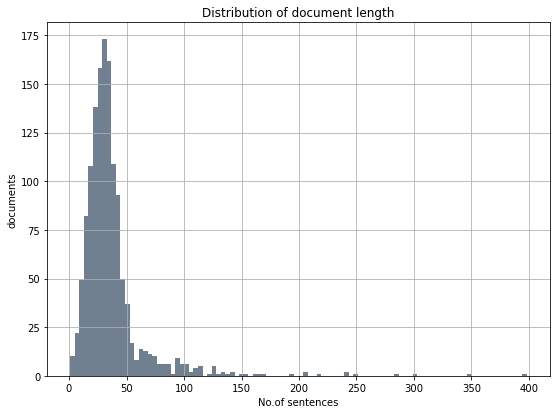

In [332]:
plt.figure(figsize=(9,6.5))
pd.Series(all_sentence_length).hist(bins=100, color='slategray' )

plt.xlabel('No.of sentences')
plt.ylabel('documents')
plt.title('Distribution of document length')

In [182]:
#stemmed sentence with keyword only

sentence_corpus_3_1018 = []
for i in range(len(sentence_corpus_2_1018)):
    sentence_corpus_doc = []
    for r in range(len(sentence_corpus_2_1018[i])):
        for k in range(len(keyword_list_1018)):
            if ((keyword_list_1018[k] in sentence_corpus_2_1018[i][r]) and (sentence_corpus_2_1018[i][r] not in sentence_corpus_doc)):
                sentence_corpus_doc.append(sentence_corpus_2_1018[i][r])
    sentence_corpus_3_1018.append(sentence_corpus_doc)
    

In [183]:
#stemmed sentence with keyword >= 2

sentence_corpus_3a_1018 = []
for i in range(len(sentence_corpus_3_1018)):
    doc_sentence = []
    for r in range(len(sentence_corpus_3_1018[i])):
        sentence_keyword_count = []
        for keyword in keyword_list_1018:
            if keyword in sentence_corpus_3_1018[i][r]:
                sentence_keyword_count.append(keyword)
        if len(sentence_keyword_count) >= 2:
            print(len(sentence_keyword_count))
            print(sentence_corpus_3_1018[i][r])
            doc_sentence.append(sentence_corpus_3_1018[i][r])
        else:
            continue
    sentence_corpus_3a_1018.append(doc_sentence)
    

7
compani system place encourag report concern protect whistleblow train director compani approv statement avail s.a. brain & co limit websit .
2
remain regular contact supplier , work , rais awar , seek assur modern slaveri occur within supplier .
2
provid train increas awar amongst employe third parti supplier , includ make awar modern slaveri helplin .
3
matt kearsey manag director hall & woodhous limit 9.6.2020 http : //www.hall-woodhouse.co.uk/slavery/ slaveri hall woodhous modern slaveri crime gross violat fundament human right compat h & w 's compani valu .
6
h & w place system encourag report concern protect whistl blower .
2
also conduct regular visit supplier , includ visit director respons complianc respect team team 's supplier consid principl modern slaveri act throughout recruit process .
3
modern slaveri provid contact detail uk slaveri helplin .
3
also oper whistl blow polici , aim employe , encourag staff report wrongdo , includ human right violat modern slaveri human 

In [184]:
#stemmed sentence with keyword >=2 and 'NA' for lines without keyword

sentence_corpus_3b_1018 = []
for i in range(len(sentence_corpus_3a_1018)):
    if len(sentence_corpus_3a_1018[i])==0:
        sentence_corpus_3b_1018.append('NA')
    elif len(sentence_corpus_3a_1018[i]) > 0:
        join_text = ' '.join(sentence_corpus_3a_1018[i])
        sentence_corpus_3b_1018.append(join_text)

In [185]:
#standardized hotline, whole sentence corpus

sentence_corpus_3c_1018 = []

for i in range(len(sentence_corpus_3b_1018)):
    if 'helplin' in sentence_corpus_3b_1018[i]:
        x = sentence_corpus_3b_1018[i].replace('helplin', 'hotlin')
        sentence_corpus_3c_1018.append(x)
        
    elif 'help-lin' in sentence_corpus_3b_1018[i]:
        x = sentence_corpus_3b_1018[i].replace('help-lin', 'hotlin')
        sentence_corpus_3c_1018.append(x)
        
    elif 'help line' in sentence_corpus_3b_1018[i]:
        x = sentence_corpus_3b_1018[i].replace('help line', 'hotlin')
        sentence_corpus_3c_1018.append(x)
        
    elif 'line' in sentence_corpus_3b_1018[i]:
        x = sentence_corpus_3b_1018[i].replace('line', 'hotlin')
        sentence_corpus_3c_1018.append(x)
    
    elif 'telephon' in sentence_corpus_3b_1018[i]:
        x = sentence_corpus_3b_1018[i].replace('telephon', 'hotlin')
        sentence_corpus_3c_1018.append(x)
        
    elif 'phone' in sentence_corpus_3b_1018[i]:
        x = sentence_corpus_3b_1018[i].replace('phone', 'hotlin')
        sentence_corpus_3c_1018.append(x)
        
    elif 'number' in sentence_corpus_3b_1018[i]:
        x = sentence_corpus_3b_1018[i].replace('number', 'hotlin')
        sentence_corpus_3c_1018.append(x)
    else:
         sentence_corpus_3c_1018.append(sentence_corpus_3b_1018[i])

In [186]:
#standardized whistleblow, whole sentence corpus

sentence_corpus_3e_1018 = []

for i in range(len(sentence_corpus_3c_1018)):
    if 'whistle-blow' in sentence_corpus_3c_1018[i]:
        x = sentence_corpus_3c_1018[i].replace('whistle-blow', 'whistleblow')
        sentence_corpus_3e_1018.append(x)
        
    elif 'whistl blow' in sentence_corpus_3c_1018[i]:
        x = sentence_corpus_3c_1018[i].replace('whistl blow', 'whistleblow')
        sentence_corpus_3e_1018.append(x)
        
    elif 'whistl blower' in sentence_corpus_3c_1018[i]:
        x = sentence_corpus_3c_1018[i].replace('whistl blower', 'whistleblow')
        sentence_corpus_3e_1018.append(x)
    else:
         sentence_corpus_3e_1018.append(sentence_corpus_3c_1018[i])

In [187]:
len(sentence_corpus_3e_1018)

1343

In [2]:
stem_keywords_1 = ['whistleblow','independ','incid','report','bring ani concern','rais','concern','suspect incid',
 'bring issu','encourag','complianc','ethic','hotlin','helplin', 'help-lin','help line','line','telephon',
 'phone','number','line','email','channel','onlin portal','grievanc','mechan','mailto','speak up','24/7','24-hour',
 '24 hour','ethicspoint','board','member','manag','depart','team','hr','senior','offic','director','ombudsman',
 'integr','head','human resourc','risk','audit committe','contact','ethic','supervisor','legal','depart','risk',
 'compani secretari','team','attent','workplac repres','qualiti','execut','nomin','address','focal point',
 'anonym','confidenti','complianc','in confid','detriment','treatment','without fear','repris','protect',
 'against','without ani risk','freedom','discrimin','retali','retribut','victimis','recrimin','anti-retali',
 'dismiss','disciplinari action','threat','unfair','repercuss','non-retali']

print(len(stem_keywords_1))

86


In [190]:
#keywords only, list of words not string
sentence_corpus_3h_1018 = []
for i in range(len(sentence_corpus_3e_1018)):
    sentence_corpus_3g = []
    for keyword in stem_keywords_1:
        if keyword in sentence_corpus_3e_1018[i]:
            sentence_corpus_3g.append(keyword)
    sentence_corpus_3h_1018.append(sentence_corpus_3g)


In [191]:
#keywords only corpus
sentence_corpus_3g_1018 = []
for i in range(len(sentence_corpus_3h_1018)):
    text = ' '.join(sentence_corpus_3h_1018[i])
    sentence_corpus_3g_1018.append(text)
    
sentence_corpus_3g_1018 

['whistleblow report concern encourag director protect',
 'rais hotlin contact',
 'whistleblow report concern encourag complianc hotlin manag team hr director contact team complianc protect',
 'whistleblow report rais concern encourag manag',
 'whistleblow report rais concern encourag grievanc manag director risk legal risk compani secretari protect',
 'whistleblow report rais concern encourag member manag director risk risk address protect',
 'rais encourag manag team team',
 '',
 'report rais concern contact confidenti',
 'independ report complianc member manag depart offic director risk depart risk complianc',
 'hr protect',
 'report manag team senior director team',
 'report rais hotlin number board manag hr director protect',
 'whistleblow rais concern manag senior director confidenti',
 'complianc manag hr offic director risk risk complianc',
 'manag attent',
 'report encourag complianc channel grievanc mechan confidenti complianc treatment protect',
 'report encourag ethic manag

In [192]:
#keywords only corpus, change empty string to 'NA'
sentence_corpus_3g1_1018 = []
for i in range(len(sentence_corpus_3g_1018)):
    if len(sentence_corpus_3g_1018[i])> 0:
        sentence_corpus_3g1_1018.append(sentence_corpus_3g_1018[i])
    elif len(sentence_corpus_3g_1018[i])== 0:
        sentence_corpus_3g1_1018.append('NA')

In [193]:
sentence_corpus_3g1_1018

['whistleblow report concern encourag director protect',
 'rais hotlin contact',
 'whistleblow report concern encourag complianc hotlin manag team hr director contact team complianc protect',
 'whistleblow report rais concern encourag manag',
 'whistleblow report rais concern encourag grievanc manag director risk legal risk compani secretari protect',
 'whistleblow report rais concern encourag member manag director risk risk address protect',
 'rais encourag manag team team',
 'NA',
 'report rais concern contact confidenti',
 'independ report complianc member manag depart offic director risk depart risk complianc',
 'hr protect',
 'report manag team senior director team',
 'report rais hotlin number board manag hr director protect',
 'whistleblow rais concern manag senior director confidenti',
 'complianc manag hr offic director risk risk complianc',
 'manag attent',
 'report encourag complianc channel grievanc mechan confidenti complianc treatment protect',
 'report encourag ethic man

In [194]:
ky1_1 = []
ky1_0 = []
ky0_1 = []
ky0_0 = []
for i in range(len(sentence_corpus_3g_1018)):
    if len(sentence_corpus_3g_1018[i])>0 and df_1018.label[i] == 1:
        ky1_1.append(i)
    elif len(sentence_corpus_3g_1018[i])>0 and df_1018.label[i] == 0:
        ky1_0.append(i)
    elif len(sentence_corpus_3g_1018[i])==0 and df_1018.label[i] == 0:
        ky0_0.append(i)
    elif len(sentence_corpus_3g_1018[i])==0 and df_1018.label[i] == 1:
        ky0_1.append(i)
    
print(len(ky1_1))
print(len(ky1_0))
print(len(ky0_1))
print(len(ky0_0))

688
521
10
124


### TF-IDF - sentence representation

In [196]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [197]:
tf_idf_1 = TfidfVectorizer(ngram_range=(1, 1),binary=True,smooth_idf=False)
tf_idf_2 = TfidfVectorizer(ngram_range=(2, 2),binary=True,smooth_idf=False)
tf_idf_3 = TfidfVectorizer(ngram_range=(1, 2),binary=True,smooth_idf=False)

w_corpus = sentence_corpus_3e_1018 #whole sentence corpus

data_0_t = pd.DataFrame(tf_idf_1.fit_transform(w_corpus).todense(), columns= tf_idf_1.vocabulary_)
data_0_t


compani  system  place  encourag  report  concern  protect  whistleblow  \
0         0.0     0.0    0.0       0.0     0.0      0.0      0.0          0.0   
1         0.0     0.0    0.0       0.0     0.0      0.0      0.0          0.0   
2         0.0     0.0    0.0       0.0     0.0      0.0      0.0          0.0   
3         0.0     0.0    0.0       0.0     0.0      0.0      0.0          0.0   
4         0.0     0.0    0.0       0.0     0.0      0.0      0.0          0.0   
...       ...     ...    ...       ...     ...      ...      ...          ...   
1338      0.0     0.0    0.0       0.0     0.0      0.0      0.0          0.0   
1339      0.0     0.0    0.0       0.0     0.0      0.0      0.0          0.0   
1340      0.0     0.0    0.0       0.0     0.0      0.0      0.0          0.0   
1341      0.0     0.0    0.0       0.0     0.0      0.0      0.0          0.0   
1342      0.0     0.0    0.0       0.0     0.0      0.0      0.0          0.0   

      train  director  ...  hseq  ims  creagh  infosec  rewardgateway  \
0       0.0       0.0  ...   0.0  0.0     0.0      0.0            0.0   
1       0.0       0.0  ...   0.0  0.0     0.0      0.0            0.0   
2       0.0       0.0  ...   0.0  0.0     0.0      0.0            0.0   
3       0.0       0.0  ...   0.0  0.0     0.0      0.0            0.0   
4       0.0       0.0  ...   0.0  0.0     0.0      0.0            0.0   
...     ...       ...  ...   ...  ...     ...      ...            ...   
1338    0.0       0.0  ...   0.0  0.0     0.0      0.0            0.0   
1339    0.0       0.0  ...   0.0  0.0     0.0      0.0            0.0   
1340    0.0       0.0  ...   0.0  0.0     0.0      0.0            0.0   
1341    0.0       0.0  ...   0.0  0.0     0.0      0.0            0.0   
1342    0.0       0.0  ...   0.0  0.0     0.0      0.0            0.0   

      originukoperations  beeney  pater  fertilis  amen  
0                    0.0     0.0    0.0       0.0   0.0  
1                    0.0     0.0    0.0       0.0   0.0  
2                    0.0     0.0    0.0       0.0   0.0  
3                    0.0     0.0    0.0       0.0   0.0  
4                    0.0     0.0    0.0       0.0   0.0  
...                  ...     ...    ...       ...   ...  
1338                 0.0     0.0    0.0       0.0   0.0  
1339                 0.0     0.0    0.0       0.0   0.0  
1340                 0.0     0.0    0.0       0.0   0.0  
1341                 0.0     0.0    0.0       0.0   0.0  
1342                 0.0     0.0    0.0       0.0   0.0  

[1343 rows x 8044 columns]

In [55]:
data_1_t = pd.DataFrame(tf_idf_2.fit_transform(w_corpus).todense(), columns= tf_idf_2.vocabulary_)
data_1_t


compani system  system place  place encourag  encourag report  \
0                0.0           0.0             0.0              0.0   
1                0.0           0.0             0.0              0.0   
2                0.0           0.0             0.0              0.0   
3                0.0           0.0             0.0              0.0   
4                0.0           0.0             0.0              0.0   
...              ...           ...             ...              ...   
1338             0.0           0.0             0.0              0.0   
1339             0.0           0.0             0.0              0.0   
1340             0.0           0.0             0.0              0.0   
1341             0.0           0.0             0.0              0.0   
1342             0.0           0.0             0.0              0.0   

      report concern  concern protect  protect whistleblow  whistleblow train  \
0                0.0              0.0                  0.0                0.0   
1                0.0              0.0                  0.0                0.0   
2                0.0              0.0                  0.0                0.0   
3                0.0              0.0                  0.0                0.0   
4                0.0              0.0                  0.0                0.0   
...              ...              ...                  ...                ...   
1338             0.0              0.0                  0.0                0.0   
1339             0.0              0.0                  0.0                0.0   
1340             0.0              0.0                  0.0                0.0   
1341             0.0              0.0                  0.0                0.0   
1342             0.0              0.0                  0.0                0.0   

      train director  director compani  ...  robert beeney  beeney financ  \
0                0.0               0.0  ...            0.0            0.0   
1                0.0               0.0  ...            0.0            0.0   
2                0.0               0.0  ...            0.0            0.0   
3                0.0               0.0  ...            0.0            0.0   
4                0.0               0.0  ...            0.0            0.0   
...              ...               ...  ...            ...            ...   
1338             0.0               0.0  ...            0.0            0.0   
1339             0.0               0.0  ...            0.0            0.0   
1340             0.0               0.0  ...            0.0            0.0   
1341             0.0               0.0  ...            0.0            0.0   
1342             0.0               0.0  ...            0.0            0.0   

      director michael  michael pater  pater manag  origin fertilis  \
0                  0.0            0.0          0.0              0.0   
1                  0.0            0.0          0.0              0.0   
2                  0.0            0.0          0.0              0.0   
3                  0.0            0.0          0.0              0.0   
4                  0.0            0.0          0.0              0.0   
...                ...            ...          ...              ...   
1338               0.0            0.0          0.0              0.0   
1339               0.0            0.0          0.0              0.0   
1340               0.0            0.0          0.0              0.0   
1341               0.0            0.0          0.0              0.0   
1342               0.0            0.0          0.0              0.0   

      fertilis chri  chri clark  clark manag  origin amen  
0               0.0         0.0          0.0          0.0  
1               0.0         0.0          0.0          0.0  
2               0.0         0.0          0.0          0.0  
3               0.0         0.0          0.0          0.0  
4               0.0         0.0          0.0          0.0  
...             ...         ...          .

In [56]:
data_2_t = pd.DataFrame(tf_idf_3.fit_transform(w_corpus).todense(), columns= tf_idf_3.vocabulary_)
data_2_t


compani  system  place  encourag  report  concern  protect  whistleblow  \
0         0.0     0.0    0.0       0.0     0.0      0.0      0.0          0.0   
1         0.0     0.0    0.0       0.0     0.0      0.0      0.0          0.0   
2         0.0     0.0    0.0       0.0     0.0      0.0      0.0          0.0   
3         0.0     0.0    0.0       0.0     0.0      0.0      0.0          0.0   
4         0.0     0.0    0.0       0.0     0.0      0.0      0.0          0.0   
...       ...     ...    ...       ...     ...      ...      ...          ...   
1338      0.0     0.0    0.0       0.0     0.0      0.0      0.0          0.0   
1339      0.0     0.0    0.0       0.0     0.0      0.0      0.0          0.0   
1340      0.0     0.0    0.0       0.0     0.0      0.0      0.0          0.0   
1341      0.0     0.0    0.0       0.0     0.0      0.0      0.0          0.0   
1342      0.0     0.0    0.0       0.0     0.0      0.0      0.0          0.0   

      train  director  ...  robert beeney  beeney financ  director michael  \
0       0.0       0.0  ...            0.0            0.0               0.0   
1       0.0       0.0  ...            0.0            0.0               0.0   
2       0.0       0.0  ...            0.0            0.0               0.0   
3       0.0       0.0  ...            0.0            0.0               0.0   
4       0.0       0.0  ...            0.0            0.0               0.0   
...     ...       ...  ...            ...            ...               ...   
1338    0.0       0.0  ...            0.0            0.0               0.0   
1339    0.0       0.0  ...            0.0            0.0               0.0   
1340    0.0       0.0  ...            0.0            0.0               0.0   
1341    0.0       0.0  ...            0.0            0.0               0.0   
1342    0.0       0.0  ...            0.0            0.0               0.0   

      michael pater  pater manag  origin fertilis  fertilis chri  chri clark  \
0               0.0          0.0              0.0            0.0         0.0   
1               0.0          0.0              0.0            0.0         0.0   
2               0.0          0.0              0.0            0.0         0.0   
3               0.0          0.0              0.0            0.0         0.0   
4               0.0          0.0              0.0            0.0         0.0   
...             ...          ...              ...            ...         ...   
1338            0.0          0.0              0.0            0.0         0.0   
1339            0.0          0.0              0.0            0.0         0.0   
1340            0.0          0.0              0.0            0.0         0.0   
1341            0.0          0.0              0.0            0.0         0.0   
1342            0.0          0.0              0.0            0.0         0.0   

      clark manag  origin amen  
0             0.0          0.0  
1             0.0          0.0  
2             0.0          0.0  
3             0.0          0.0  
4             0.0          0.0  
...           ...          ...  
1338          0.0          0.0  
1339          0.0          0.0  
1340          0.0          0.0  
1341          0.0          0.0  
1342          0.0          0.0  

[1343 rows x 72772 columns]

In [202]:
#keywords only corpus
k_corpus = sentence_corpus_3g_1018 

data_3_t = pd.DataFrame(tf_idf_1.fit_transform(k_corpus).todense(), columns= tf_idf_1.vocabulary_)
data_3_t

whistleblow  report  concern  encourag  director  protect  rais  hotlin  \
0             0.0     0.0      0.0       0.0   0.00000      0.0   0.0     0.0   
1             0.0     0.0      0.0       0.0   0.00000      0.0   0.0     0.0   
2             0.0     0.0      0.0       0.0   0.00000      0.0   0.0     0.0   
3             0.0     0.0      0.0       0.0   0.00000      0.0   0.0     0.0   
4             0.0     0.0      0.0       0.0   0.00000      0.0   0.0     0.0   
...           ...     ...      ...       ...       ...      ...   ...     ...   
1338          0.0     0.0      0.0       0.0   0.00000      0.0   0.0     0.0   
1339          0.0     0.0      0.0       0.0   0.00000      0.0   0.0     0.0   
1340          0.0     0.0      0.0       0.0   0.00000      0.0   0.0     0.0   
1341          0.0     0.0      0.0       0.0   0.00000      0.0   0.0     0.0   
1342          0.0     0.0      0.0       0.0   0.41292      0.0   0.0     0.0   

       contact  complianc  ...  ethicspoint     bring  issu  suspect  \
0     0.000000        0.0  ...          0.0  0.000000   0.0      0.0   
1     0.000000        0.0  ...          0.0  0.000000   0.0      0.0   
2     0.000000        0.0  ...          0.0  0.352842   0.0      0.0   
3     0.000000        0.0  ...          0.0  0.000000   0.0      0.0   
4     0.000000        0.0  ...          0.0  0.000000   0.0      0.0   
...        ...        ...  ...          ...       ...   ...      ...   
1338  0.000000        0.0  ...          0.0  0.000000   0.0      0.0   
1339  0.000000        0.0  ...          0.0  0.000000   0.0      0.0   
1340  0.000000        0.0  ...          0.0  0.000000   0.0      0.0   
1341  0.000000        0.0  ...          0.0  0.000000   0.0      0.0   
1342  0.334858        0.0  ...          0.0  0.000000   0.0      0.0   

      workplac  repres  ombudsman   against     focal  point  
0          0.0     0.0        0.0  0.382858  0.000000    0.0  
1          0.0     0.0        0.0  0.000000  0.000000    0.0  
2          0.0     0.0        0.0  0.252299  0.000000    0.0  
3          0.0     0.0        0.0  0.421594  0.000000    0.0  
4          0.0     0.0        0.0  0.179671  0.000000    0.0  
...        ...     ...        ...       ...       ...    ...  
1338       0.0     0.0        0.0  0.297030  0.000000    0.0  
1339       0.0     0.0        0.0  0.519192  0.000000    0.0  
1340       0.0     0.0        0.0  0.183522  0.000000    0.0  
1341       0.0     0.0        0.0  0.000000  0.347027    0.0  
1342       0.0     0.0        0.0  0.236227  0.000000    0.0  

[1343 rows x 83 columns]

In [58]:
data_4_t = pd.DataFrame(tf_idf_2.fit_transform(k_corpus).todense(), columns= tf_idf_2.vocabulary_)
data_4_t

whistleblow report  report concern  concern encourag  encourag director  \
0                    0.0             0.0               0.0                0.0   
1                    0.0             0.0               0.0                0.0   
2                    0.0             0.0               0.0                0.0   
3                    0.0             0.0               0.0                0.0   
4                    0.0             0.0               0.0                0.0   
...                  ...             ...               ...                ...   
1338                 0.0             0.0               0.0                0.0   
1339                 0.0             0.0               0.0                0.0   
1340                 0.0             0.0               0.0                0.0   
1341                 0.0             0.0               0.0                0.0   
1342                 0.0             0.0               0.0                0.0   

      director protect  rais hotlin  hotlin contact  encourag complianc  \
0                  0.0          0.0             0.0                 0.0   
1                  0.0          0.0             0.0                 0.0   
2                  0.0          0.0             0.0                 0.0   
3                  0.0          0.0             0.0                 0.0   
4                  0.0          0.0             0.0                 0.0   
...                ...          ...             ...                 ...   
1338               0.0          0.0             0.0                 0.0   
1339               0.0          0.0             0.0                 0.0   
1340               0.0          0.0             0.0                 0.0   
1341               0.0          0.0             0.0                 0.0   
1342               0.0          0.0             0.0                 0.0   

      complianc hotlin  hotlin manag  ...  24 24  victimis repercuss  \
0                  0.0           0.0  ...    0.0                 0.0   
1                  0.0           0.0  ...    0.0                 0.0   
2                  0.0           0.0  ...    0.0                 0.0   
3                  0.0           0.0  ...    0.0                 0.0   
4                  0.0           0.0  ...    0.0                 0.0   
...                ...           ...  ...    ...                 ...   
1338               0.0           0.0  ...    0.0                 0.0   
1339               0.0           0.0  ...    0.0                 0.0   
1340               0.0           0.0  ...    0.0                 0.0   
1341               0.0           0.0  ...    0.0                 0.0   
1342               0.0           0.0  ...    0.0                 0.0   

      grievanc risk  ombudsman integr  discrimin disciplinari  mechan mailto  \
0               0.0               0.0                     0.0        0.00000   
1               0.0               0.0                     0.0        0.00000   
2               0.0               0.0                     0.0        0.00000   
3               0.0               0.0                     0.0        0.00000   
4               0.0               0.0                     0.0        0.00000   
...             ...               ...                     ...            ...   
1338            0.0               0.0                     0.0        0.00000   
1339            0.0               0.0                     0.0        0.00000   
1340            0.0               0.0                     0.0        0.00000   
1341            0.0               0.0                     0.0        0.00000   
1342            0.0               0.0                     0.0        0.29528   

      mailto ethicspoint  email ethicspoint  senior protect  grievanc director  
0               0.219801                0.0        0.000000                0.0  
1               0.000000                0.0        0.000000                0.0  
2               0.179562                0.0        0.000000    

In [59]:
data_5_t = pd.DataFrame(tf_idf_3.fit_transform(k_corpus).todense(), columns= tf_idf_3.vocabulary_)
data_5_t

whistleblow  report  concern  encourag  director  protect  \
0             0.0     0.0      0.0       0.0       0.0      0.0   
1             0.0     0.0      0.0       0.0       0.0      0.0   
2             0.0     0.0      0.0       0.0       0.0      0.0   
3             0.0     0.0      0.0       0.0       0.0      0.0   
4             0.0     0.0      0.0       0.0       0.0      0.0   
...           ...     ...      ...       ...       ...      ...   
1338          0.0     0.0      0.0       0.0       0.0      0.0   
1339          0.0     0.0      0.0       0.0       0.0      0.0   
1340          0.0     0.0      0.0       0.0       0.0      0.0   
1341          0.0     0.0      0.0       0.0       0.0      0.0   
1342          0.0     0.0      0.0       0.0       0.0      0.0   

      whistleblow report  report concern  concern encourag  encourag director  \
0                    0.0             0.0               0.0                0.0   
1                    0.0             0.0               0.0                0.0   
2                    0.0             0.0               0.0                0.0   
3                    0.0             0.0               0.0                0.0   
4                    0.0             0.0               0.0                0.0   
...                  ...             ...               ...                ...   
1338                 0.0             0.0               0.0                0.0   
1339                 0.0             0.0               0.0                0.0   
1340                 0.0             0.0               0.0                0.0   
1341                 0.0             0.0               0.0                0.0   
1342                 0.0             0.0               0.0                0.0   

      ...  24 24  victimis repercuss  grievanc risk  ombudsman integr  \
0     ...    0.0                 0.0            0.0          0.000000   
1     ...    0.0                 0.0            0.0          0.000000   
2     ...    0.0                 0.0            0.0          0.000000   
3     ...    0.0                 0.0            0.0          0.000000   
4     ...    0.0                 0.0            0.0          0.000000   
...   ...    ...                 ...            ...               ...   
1338  ...    0.0                 0.0            0.0          0.000000   
1339  ...    0.0                 0.0            0.0          0.000000   
1340  ...    0.0                 0.0            0.0          0.000000   
1341  ...    0.0                 0.0            0.0          0.000000   
1342  ...    0.0                 0.0            0.0          0.258394   

      discrimin disciplinari  mechan mailto  mailto ethicspoint  \
0                   0.200736            0.0            0.000000   
1                   0.000000            0.0            0.000000   
2                   0.157137            0.0            0.000000   
3                   0.307955            0.0            0.000000   
4                   0.125290            0.0            0.000000   
...                      ...            ...                 ...   
1338                0.164126            0.0            0.000000   
1339                0.426317            0.0            0.000000   
1340                0.128688            0.0            0.000000   
1341                0.000000            0.0            0.189729   
1342                0.000000            0.0            0.000000   

      email ethicspoint  senior protect  grievanc director  
0              0.000000             0.0                0.0  
1              0.000000             0.0                0.0  
2              0.000000             0.0                0.0  
3              0.000000             0.0                0.0  
4              0.000000             0.0                0.0  
...                 ...             ...                ...  
1338           0.000000             0.0                0.0  
1339           0.000000             0.0                0.0

### Model training - SVC

In [61]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

#whole_unigram
Result = []
train_result = []
for i in range(0,10):
    X_train, X_test, y_train, y_test = train_test_split(data_0_t, df_1018.label, test_size=0.2, random_state=i)

    clf = SVC(C=1.7)
    clf.fit(X_train, y_train)
    y_pred_train = clf.predict(X_train)
    y_pred_test = clf.predict(X_test)
    train_acc = accuracy_score(y_train, y_pred_train)
    test_acc = accuracy_score(y_test, y_pred_test)
    print(i, 'train_acc:', round(train_acc, 3), 'test_acc:', round(test_acc, 3))
    
    Result.append(test_acc)
    train_result.append(train_acc)
    
print('average train acc:', round(sum(train_result)/len(train_result),3))
print('average test acc:', round(sum(Result)/len(Result),3))
print('best acc:', 'test acc', round(max(Result), 3), 'train acc', round(max(train_result), 3))

0 train_acc: 0.992 test_acc: 0.836
1 train_acc: 0.989 test_acc: 0.807
2 train_acc: 0.988 test_acc: 0.792
3 train_acc: 0.988 test_acc: 0.81
4 train_acc: 0.993 test_acc: 0.807
5 train_acc: 0.989 test_acc: 0.84
6 train_acc: 0.992 test_acc: 0.825
7 train_acc: 0.99 test_acc: 0.807
8 train_acc: 0.99 test_acc: 0.81
9 train_acc: 0.992 test_acc: 0.844
average train acc: 0.99
average test acc: 0.818
best acc: test acc 0.844 train acc 0.993


In [62]:
#whole_bigram
Result = []
train_result = []
for i in range(0,10):
    X_train, X_test, y_train, y_test = train_test_split(data_1_t, df_1018.label, test_size=0.2, random_state=i)

    clf = SVC(C=1.6)
    clf.fit(X_train, y_train)
    y_pred_train = clf.predict(X_train)
    y_pred_test = clf.predict(X_test)
    train_acc = accuracy_score(y_train, y_pred_train)
    test_acc = accuracy_score(y_test, y_pred_test)
    print(i, 'train_acc:', round(train_acc, 3), 'test_acc:', round(test_acc, 3))
    
    Result.append(test_acc)
    train_result.append(train_acc)
    
print('average train acc:', round(sum(train_result)/len(train_result),3))
print('average test acc:', round(sum(Result)/len(Result),3))
print('best acc:', 'test acc', round(max(Result), 3), 'train acc', round(max(train_result), 3))

0 train_acc: 0.992 test_acc: 0.721
1 train_acc: 0.989 test_acc: 0.703
2 train_acc: 0.988 test_acc: 0.755
3 train_acc: 0.988 test_acc: 0.684
4 train_acc: 0.993 test_acc: 0.773
5 train_acc: 0.989 test_acc: 0.755
6 train_acc: 0.992 test_acc: 0.743
7 train_acc: 0.99 test_acc: 0.725
8 train_acc: 0.99 test_acc: 0.706
9 train_acc: 0.992 test_acc: 0.755
average train acc: 0.99
average test acc: 0.732
best acc: test acc 0.773 train acc 0.993


In [63]:
#whole_uni+bigram
Result = []
train_result = []
for i in range(0,10):
    X_train, X_test, y_train, y_test = train_test_split(data_2_t, df_1018.label, test_size=0.2, random_state=i)

    clf = SVC(C=1.6)
    clf.fit(X_train, y_train)
    y_pred_train = clf.predict(X_train)
    y_pred_test = clf.predict(X_test)
    train_acc = accuracy_score(y_train, y_pred_train)
    test_acc = accuracy_score(y_test, y_pred_test)
    print(i, 'train_acc:', round(train_acc, 3), 'test_acc:', round(test_acc, 3))
    
    Result.append(test_acc)
    train_result.append(train_acc)
    
print('average train acc:', round(sum(train_result)/len(train_result),3))
print('average test acc:', round(sum(Result)/len(Result),3))
print('best acc:', 'test acc', round(max(Result), 3), 'train acc', round(max(train_result), 3))

0 train_acc: 0.992 test_acc: 0.829
1 train_acc: 0.989 test_acc: 0.796
2 train_acc: 0.988 test_acc: 0.818
3 train_acc: 0.988 test_acc: 0.792
4 train_acc: 0.993 test_acc: 0.814
5 train_acc: 0.989 test_acc: 0.836
6 train_acc: 0.992 test_acc: 0.818
7 train_acc: 0.99 test_acc: 0.803
8 train_acc: 0.99 test_acc: 0.784
9 train_acc: 0.992 test_acc: 0.844
average train acc: 0.99
average test acc: 0.813
best acc: test acc 0.844 train acc 0.993


In [64]:
#key_unigram
Result = []
train_result = []
for i in range(0,10):
    X_train, X_test, y_train, y_test = train_test_split(data_3_t, df_1018.label, test_size=0.2, random_state=i)

    clf = SVC(C=1.7)
    clf.fit(X_train, y_train)
    y_pred_train = clf.predict(X_train)
    y_pred_test = clf.predict(X_test)
    train_acc = accuracy_score(y_train, y_pred_train)
    test_acc = accuracy_score(y_test, y_pred_test)
    print(i, 'train_acc:', round(train_acc, 3), 'test_acc:', round(test_acc, 3))
    
    Result.append(test_acc)
    train_result.append(train_acc)
    
print('average train acc:', round(sum(train_result)/len(train_result),3))
print('average test acc:', round(sum(Result)/len(Result),3))
print('best acc:', 'test acc', round(max(Result), 3), 'train acc', round(max(train_result), 3))

0 train_acc: 0.943 test_acc: 0.855
1 train_acc: 0.948 test_acc: 0.81
2 train_acc: 0.944 test_acc: 0.851
3 train_acc: 0.944 test_acc: 0.829
4 train_acc: 0.951 test_acc: 0.792
5 train_acc: 0.951 test_acc: 0.81
6 train_acc: 0.946 test_acc: 0.848
7 train_acc: 0.952 test_acc: 0.844
8 train_acc: 0.949 test_acc: 0.792
9 train_acc: 0.952 test_acc: 0.844
average train acc: 0.948
average test acc: 0.828
best acc: test acc 0.855 train acc 0.952


In [65]:
#key_bigram
Result = []
train_result = []
for i in range(0,10):
    X_train, X_test, y_train, y_test = train_test_split(data_4_t, df_1018.label, test_size=0.2, random_state=i)

    clf = SVC(C=1.7)
    clf.fit(X_train, y_train)
    y_pred_train = clf.predict(X_train)
    y_pred_test = clf.predict(X_test)
    train_acc = accuracy_score(y_train, y_pred_train)
    test_acc = accuracy_score(y_test, y_pred_test)
    print(i, 'train_acc:', round(train_acc, 3), 'test_acc:', round(test_acc, 3))
    
    Result.append(test_acc)
    train_result.append(train_acc)
    
print('average train acc:', round(sum(train_result)/len(train_result),3))
print('average test acc:', round(sum(Result)/len(Result),3))
print('best acc:', 'test acc', round(max(Result), 3), 'train acc', round(max(train_result), 3))

0 train_acc: 0.98 test_acc: 0.829
1 train_acc: 0.979 test_acc: 0.762
2 train_acc: 0.978 test_acc: 0.799
3 train_acc: 0.979 test_acc: 0.803
4 train_acc: 0.983 test_acc: 0.732
5 train_acc: 0.984 test_acc: 0.762
6 train_acc: 0.98 test_acc: 0.796
7 train_acc: 0.98 test_acc: 0.803
8 train_acc: 0.982 test_acc: 0.77
9 train_acc: 0.983 test_acc: 0.799
average train acc: 0.981
average test acc: 0.786
best acc: test acc 0.829 train acc 0.984


In [66]:
#key_uni+bigram
Result = []
train_result = []
for i in range(0,10):
    X_train, X_test, y_train, y_test = train_test_split(data_5_t, df_1018.label, test_size=0.2, random_state=i)

    clf = SVC(C=1.7)
    clf.fit(X_train, y_train)
    y_pred_train = clf.predict(X_train)
    y_pred_test = clf.predict(X_test)
    train_acc = accuracy_score(y_train, y_pred_train)
    test_acc = accuracy_score(y_test, y_pred_test)
    print(i, 'train_acc:', round(train_acc, 3), 'test_acc:', round(test_acc, 3))
    
    Result.append(test_acc)
    train_result.append(train_acc)
    
print('average train acc:', round(sum(train_result)/len(train_result),3))
print('average test acc:', round(sum(Result)/len(Result),3))
print('best acc:', 'test acc', round(max(Result), 3), 'train acc', round(max(train_result), 3))

0 train_acc: 0.979 test_acc: 0.829
1 train_acc: 0.978 test_acc: 0.762
2 train_acc: 0.976 test_acc: 0.807
3 train_acc: 0.977 test_acc: 0.803
4 train_acc: 0.98 test_acc: 0.732
5 train_acc: 0.981 test_acc: 0.784
6 train_acc: 0.98 test_acc: 0.818
7 train_acc: 0.977 test_acc: 0.818
8 train_acc: 0.98 test_acc: 0.796
9 train_acc: 0.98 test_acc: 0.822
average train acc: 0.979
average test acc: 0.797
best acc: test acc 0.829 train acc 0.981


### Model training - MLP

In [83]:
from sklearn.neural_network import MLPClassifier

#whole_unigram

Result = []
train_result = []
for i in range(0,10):
    X_train, X_test, y_train, y_test = train_test_split(data_0_t, df_1018.label, test_size=0.2, random_state=i)
    clf = MLPClassifier(hidden_layer_sizes=(10000,500), random_state=i, max_iter=200,  alpha = 0.001, early_stopping=True).fit(X_train, y_train)
    y_pred_train = clf.predict(X_train)
    y_pred_test = clf.predict(X_test)
    train_acc = accuracy_score(y_train, y_pred_train)
    test_acc = accuracy_score(y_test, y_pred_test)
    print(i , 'train_acc:', round(train_acc,4), 'test_acc:', round(test_acc, 4))
    
    Result.append(test_acc)
    train_result.append(train_acc)
    
print('average train acc:', round(sum(train_result)/len(train_result),3))
print('average test acc:', round(sum(Result)/len(Result),3))
print('best acc:', 'test acc', round(max(Result), 3), 'train acc', round(max(train_result), 3))

0 train_acc: 0.9665 test_acc: 0.7844
1 train_acc: 0.9777 test_acc: 0.7993
2 train_acc: 0.9218 test_acc: 0.777
3 train_acc: 0.9516 test_acc: 0.7993
4 train_acc: 0.9609 test_acc: 0.7881
5 train_acc: 0.9488 test_acc: 0.8104
6 train_acc: 0.933 test_acc: 0.7621
7 train_acc: 0.9637 test_acc: 0.7807
8 train_acc: 0.9581 test_acc: 0.7732
9 train_acc: 0.9674 test_acc: 0.7695
average train acc: 0.955
average test acc: 0.784
best acc: test acc 0.81 train acc 0.978


In [84]:
#whole_bigram

Result = []
train_result = []
for i in range(0,10):
    X_train, X_test, y_train, y_test = train_test_split(data_1_t, df_1018.label, test_size=0.2, random_state=i)
    clf = MLPClassifier(hidden_layer_sizes=(10000,500), random_state=i, max_iter=200,  alpha = 0.001, early_stopping=True).fit(X_train, y_train)
    y_pred_train = clf.predict(X_train)
    y_pred_test = clf.predict(X_test)
    train_acc = accuracy_score(y_train, y_pred_train)
    test_acc = accuracy_score(y_test, y_pred_test)
    print(i , 'train_acc:', round(train_acc,4), 'test_acc:', round(test_acc, 4))
    
    Result.append(test_acc)
    train_result.append(train_acc)
    
print('average train acc:', round(sum(train_result)/len(train_result),3))
print('average test acc:', round(sum(Result)/len(Result),3))
print('best acc:', 'test acc', round(max(Result), 3), 'train acc', round(max(train_result), 3))

0 train_acc: 0.9721 test_acc: 0.8104
1 train_acc: 0.9739 test_acc: 0.7695
2 train_acc: 0.9711 test_acc: 0.7844
3 train_acc: 0.9749 test_acc: 0.7435
4 train_acc: 0.9702 test_acc: 0.7732
5 train_acc: 0.9702 test_acc: 0.7695
6 train_acc: 0.9674 test_acc: 0.7546
7 train_acc: 0.9702 test_acc: 0.7881
8 train_acc: 0.9702 test_acc: 0.7435
9 train_acc: 0.9749 test_acc: 0.8067
average train acc: 0.972
average test acc: 0.774
best acc: test acc 0.81 train acc 0.975


In [85]:
#whole_unigram+bigram

Result = []
train_result = []
for i in range(0,10):
    X_train, X_test, y_train, y_test = train_test_split(data_2_t, df_1018.label, test_size=0.2, random_state=i)
    clf = MLPClassifier(hidden_layer_sizes=(10000,500), random_state=i, max_iter=200,  alpha = 0.001, early_stopping=True).fit(X_train, y_train)
    y_pred_train = clf.predict(X_train)
    y_pred_test = clf.predict(X_test)
    train_acc = accuracy_score(y_train, y_pred_train)
    test_acc = accuracy_score(y_test, y_pred_test)
    print(i , 'train_acc:', round(train_acc,4), 'test_acc:', round(test_acc, 4))
    
    Result.append(test_acc)
    train_result.append(train_acc)
    
print('average train acc:', round(sum(train_result)/len(train_result),3))
print('average test acc:', round(sum(Result)/len(Result),3))
print('best acc:', 'test acc', round(max(Result), 3), 'train acc', round(max(train_result), 3))

0 train_acc: 0.9628 test_acc: 0.8216
1 train_acc: 0.973 test_acc: 0.803
2 train_acc: 0.9683 test_acc: 0.7249
3 train_acc: 0.9702 test_acc: 0.7249
4 train_acc: 0.9767 test_acc: 0.803
5 train_acc: 0.9609 test_acc: 0.7918
6 train_acc: 0.9665 test_acc: 0.7509
7 train_acc: 0.9739 test_acc: 0.7955
8 train_acc: 0.9683 test_acc: 0.7695
9 train_acc: 0.9721 test_acc: 0.8327
average train acc: 0.969
average test acc: 0.782
best acc: test acc 0.833 train acc 0.977


In [80]:
from sklearn.neural_network import MLPClassifier

#key_unigram

train_result = []
for i in range(0,10):
    X_train, X_test, y_train, y_test = train_test_split(data_3_t, df_1018.label, test_size=0.2, random_state=i)
    clf = MLPClassifier(hidden_layer_sizes=(10000,500), random_state=i, max_iter=200,  alpha = 0.001, early_stopping=True, learning_rate_init=0.001).fit(X_train, y_train)
    y_pred_train = clf.predict(X_train)
    y_pred_test = clf.predict(X_test)
    train_acc = accuracy_score(y_train, y_pred_train)
    test_acc = accuracy_score(y_test, y_pred_test)
    print(i , 'train_acc:', round(train_acc,4), 'test_acc:', round(test_acc, 4))
    
    Result.append(test_acc)
    train_result.append(train_acc)
    
print('average train acc:', round(sum(train_result)/len(train_result),3))
print('average test acc:', round(sum(Result)/len(Result),3))
print('best acc:', 'test acc', round(max(Result), 3), 'train acc', round(max(train_result), 3))

0 train_acc: 0.8706 test_acc: 0.8401
1 train_acc: 0.8948 test_acc: 0.803
2 train_acc: 0.9385 test_acc: 0.8439
3 train_acc: 0.959 test_acc: 0.7993
4 train_acc: 0.9115 test_acc: 0.7695
5 train_acc: 0.9693 test_acc: 0.8067
6 train_acc: 0.8166 test_acc: 0.7695
7 train_acc: 0.905 test_acc: 0.829
8 train_acc: 0.9739 test_acc: 0.7844
9 train_acc: 0.851 test_acc: 0.8104
average train acc: 0.909
average test acc: 0.794
best acc: test acc 0.851 train acc 0.974


In [81]:
#key_bigram

Result = []
train_result = []
for i in range(0,10):
    X_train, X_test, y_train, y_test = train_test_split(data_4_t, df_1018.label, test_size=0.2, random_state=i)
    clf = MLPClassifier(hidden_layer_sizes=(10000,500), random_state=i, max_iter=200,  alpha = 0.001, early_stopping=True).fit(X_train, y_train)
    y_pred_train = clf.predict(X_train)
    y_pred_test = clf.predict(X_test)
    train_acc = accuracy_score(y_train, y_pred_train)
    test_acc = accuracy_score(y_test, y_pred_test)
    print(i , 'train_acc:', round(train_acc,4), 'test_acc:', round(test_acc, 4))
    
    Result.append(test_acc)
    train_result.append(train_acc)
    
print('average train acc:', round(sum(train_result)/len(train_result),3))
print('average test acc:', round(sum(Result)/len(Result),3))
print('best acc:', 'test acc', round(max(Result), 3), 'train acc', round(max(train_result), 3))

0 train_acc: 0.8194 test_acc: 0.7955
1 train_acc: 0.8091 test_acc: 0.7026
2 train_acc: 0.8659 test_acc: 0.7732
3 train_acc: 0.9032 test_acc: 0.7695
4 train_acc: 0.8883 test_acc: 0.7212
5 train_acc: 0.824 test_acc: 0.7435
6 train_acc: 0.8976 test_acc: 0.7844
7 train_acc: 0.9292 test_acc: 0.7955
8 train_acc: 0.9507 test_acc: 0.7584
9 train_acc: 0.8315 test_acc: 0.7844
average train acc: 0.872
average test acc: 0.763
best acc: test acc 0.796 train acc 0.951


In [82]:
#key_unigram+bigram

Result = []
train_result = []
for i in range(0,10):
    X_train, X_test, y_train, y_test = train_test_split(data_5_t, df_1018.label, test_size=0.2, random_state=i)
    clf = MLPClassifier(hidden_layer_sizes=(10000,500), random_state=i, max_iter=200,  alpha = 0.001, early_stopping=True).fit(X_train, y_train)
    y_pred_train = clf.predict(X_train)
    y_pred_test = clf.predict(X_test)
    train_acc = accuracy_score(y_train, y_pred_train)
    test_acc = accuracy_score(y_test, y_pred_test)
    print(i , 'train_acc:', round(train_acc,4), 'test_acc:', round(test_acc, 4))
    
    Result.append(test_acc)
    train_result.append(train_acc)
    
print('average train acc:', round(sum(train_result)/len(train_result),3))
print('average test acc:', round(sum(Result)/len(Result),3))
print('best acc:', 'test acc', round(max(Result), 3), 'train acc', round(max(train_result), 3))

0 train_acc: 0.851 test_acc: 0.8141
1 train_acc: 0.9292 test_acc: 0.7584
2 train_acc: 0.905 test_acc: 0.7881
3 train_acc: 0.7896 test_acc: 0.7509
4 train_acc: 0.9488 test_acc: 0.7323
5 train_acc: 0.9693 test_acc: 0.7584
6 train_acc: 0.825 test_acc: 0.8104
7 train_acc: 0.8585 test_acc: 0.8253
8 train_acc: 0.8687 test_acc: 0.7249
9 train_acc: 0.9311 test_acc: 0.8104
average train acc: 0.888
average test acc: 0.777
best acc: test acc 0.825 train acc 0.969
